In [1]:
import pandas as pd

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   Jitter(%)      5875 non-null   float64
 5   Jitter(Abs)    5875 non-null   float64
 6   Jitter:RAP     5875 non-null   float64
 7   Jitter:PPQ5    5875 non-null   float64
 8   Jitter:DDP     5875 non-null   float64
 9   Shimmer        5875 non-null   float64
 10  Shimmer(dB)    5875 non-null   float64
 11  Shimmer:APQ3   5875 non-null   float64
 12  Shimmer:APQ5   5875 non-null   float64
 13  Shimmer:APQ11  5875 non-null   float64
 14  Shimmer:DDA    5875 non-null   float64
 15  NHR            5875 non-null   float64
 16  HNR            5875 non-null   float64
 17  RPDE           5875 non-null   float64
 18  DFA     

(None,
    subject#  age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
 0         1   72    0     5.6431    0.00662     0.000034     0.00401   
 1         1   72    0    12.6660    0.00300     0.000017     0.00132   
 2         1   72    0    19.6810    0.00481     0.000025     0.00205   
 3         1   72    0    25.6470    0.00528     0.000027     0.00191   
 4         1   72    0    33.6420    0.00335     0.000020     0.00093   
 
    Jitter:PPQ5  Jitter:DDP  Shimmer  ...  Shimmer:APQ5  Shimmer:APQ11  \
 0      0.00317     0.01204  0.02565  ...       0.01309        0.01662   
 1      0.00150     0.00395  0.02024  ...       0.01072        0.01689   
 2      0.00208     0.00616  0.01675  ...       0.00844        0.01458   
 3      0.00264     0.00573  0.02309  ...       0.01265        0.01963   
 4      0.00130     0.00278  0.01703  ...       0.00929        0.01819   
 
    Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  motor_UPDRS  \
 0      0.04314  0.014290  21.

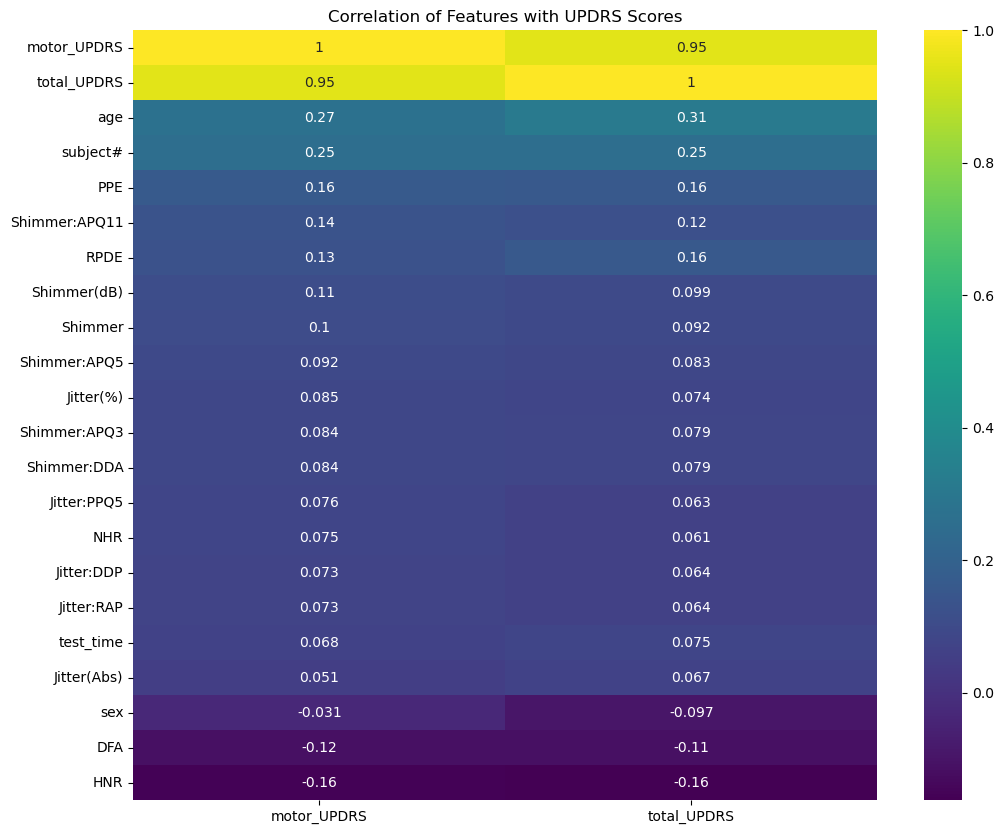

(   subject#  age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
 0         1   72    0     5.6431   0.082905    -0.284379    0.327453   
 1         1   72    0    12.6660  -0.560793    -0.756869   -0.533746   
 2         1   72    0    19.6810  -0.238944    -0.540080   -0.300038   
 3         1   72    0    25.6470  -0.155370    -0.484493   -0.344859   
 4         1   72    0    33.6420  -0.498557    -0.665151   -0.658604   
 
    Jitter:PPQ5  Jitter:DDP   Shimmer  ...  Shimmer:APQ5  Shimmer:APQ11  \
 0    -0.028637    0.328505 -0.324594  ...     -0.423356      -0.543466   
 1    -0.476212   -0.534825 -0.534016  ...     -0.565592      -0.529955   
 2    -0.320767   -0.298983 -0.669115  ...     -0.702426      -0.645545   
 3    -0.170682   -0.344871 -0.423692  ...     -0.449763      -0.392849   
 4    -0.529814   -0.659682 -0.658276  ...     -0.651413      -0.464905   
 
    Shimmer:DDA       NHR       HNR      RPDE       DFA       PPE  motor_UPDRS  \
 0    -0.209704 -0.298721 

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting voice measure columns for standardization
voice_measure_columns = data.columns[4:20]

# Standardizing the voice measures
scaler = StandardScaler()
data[voice_measure_columns] = scaler.fit_transform(data[voice_measure_columns])

# Checking the standardized data
data_standardized_head = data.head()

# Analyzing the correlation of features with the target variables
correlation_matrix = data.corr()

# Plotting the correlation matrix focusing on motor_UPDRS and total_UPDRS
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['motor_UPDRS', 'total_UPDRS']].sort_values(by='motor_UPDRS', ascending=False), annot=True, cmap='viridis')
plt.title("Correlation of Features with UPDRS Scores")
plt.show()

data_standardized_head, correlation_matrix[['motor_UPDRS', 'total_UPDRS']].sort_values(by='motor_UPDRS', ascending=False)


Standardization of Voice Measures:

The voice measures have been standardized, meaning they now have a mean of 0 and a standard deviation of 1. This is crucial for many machine learning models that are sensitive to the scale of input features.
Correlation Analysis:

There is a strong positive correlation between motor_UPDRS and total_UPDRS, as expected.
Other features show varying degrees of correlation with the UPDRS scores. For example, age and subject# have a positive correlation, while DFA and HNR show a negative correlation with UPDRS scores.
Voice measures like PPE, Shimmer:APQ11, and RPDE also show some degree of positive correlation with the UPDRS scores.
Next Steps in Feature Engineering:

Creating Interaction Features: Given the individual correlations, creating interaction terms between features like Shimmer measurements and Jitter measurements could be beneficial.
Dimensionality Reduction: If model complexity is a concern, applying PCA or similar techniques to reduce dimensionality while preserving variance could be explored.
Temporal Features: If the progression over time is significant for your analysis, creating features that capture changes over time for each patient might be useful.

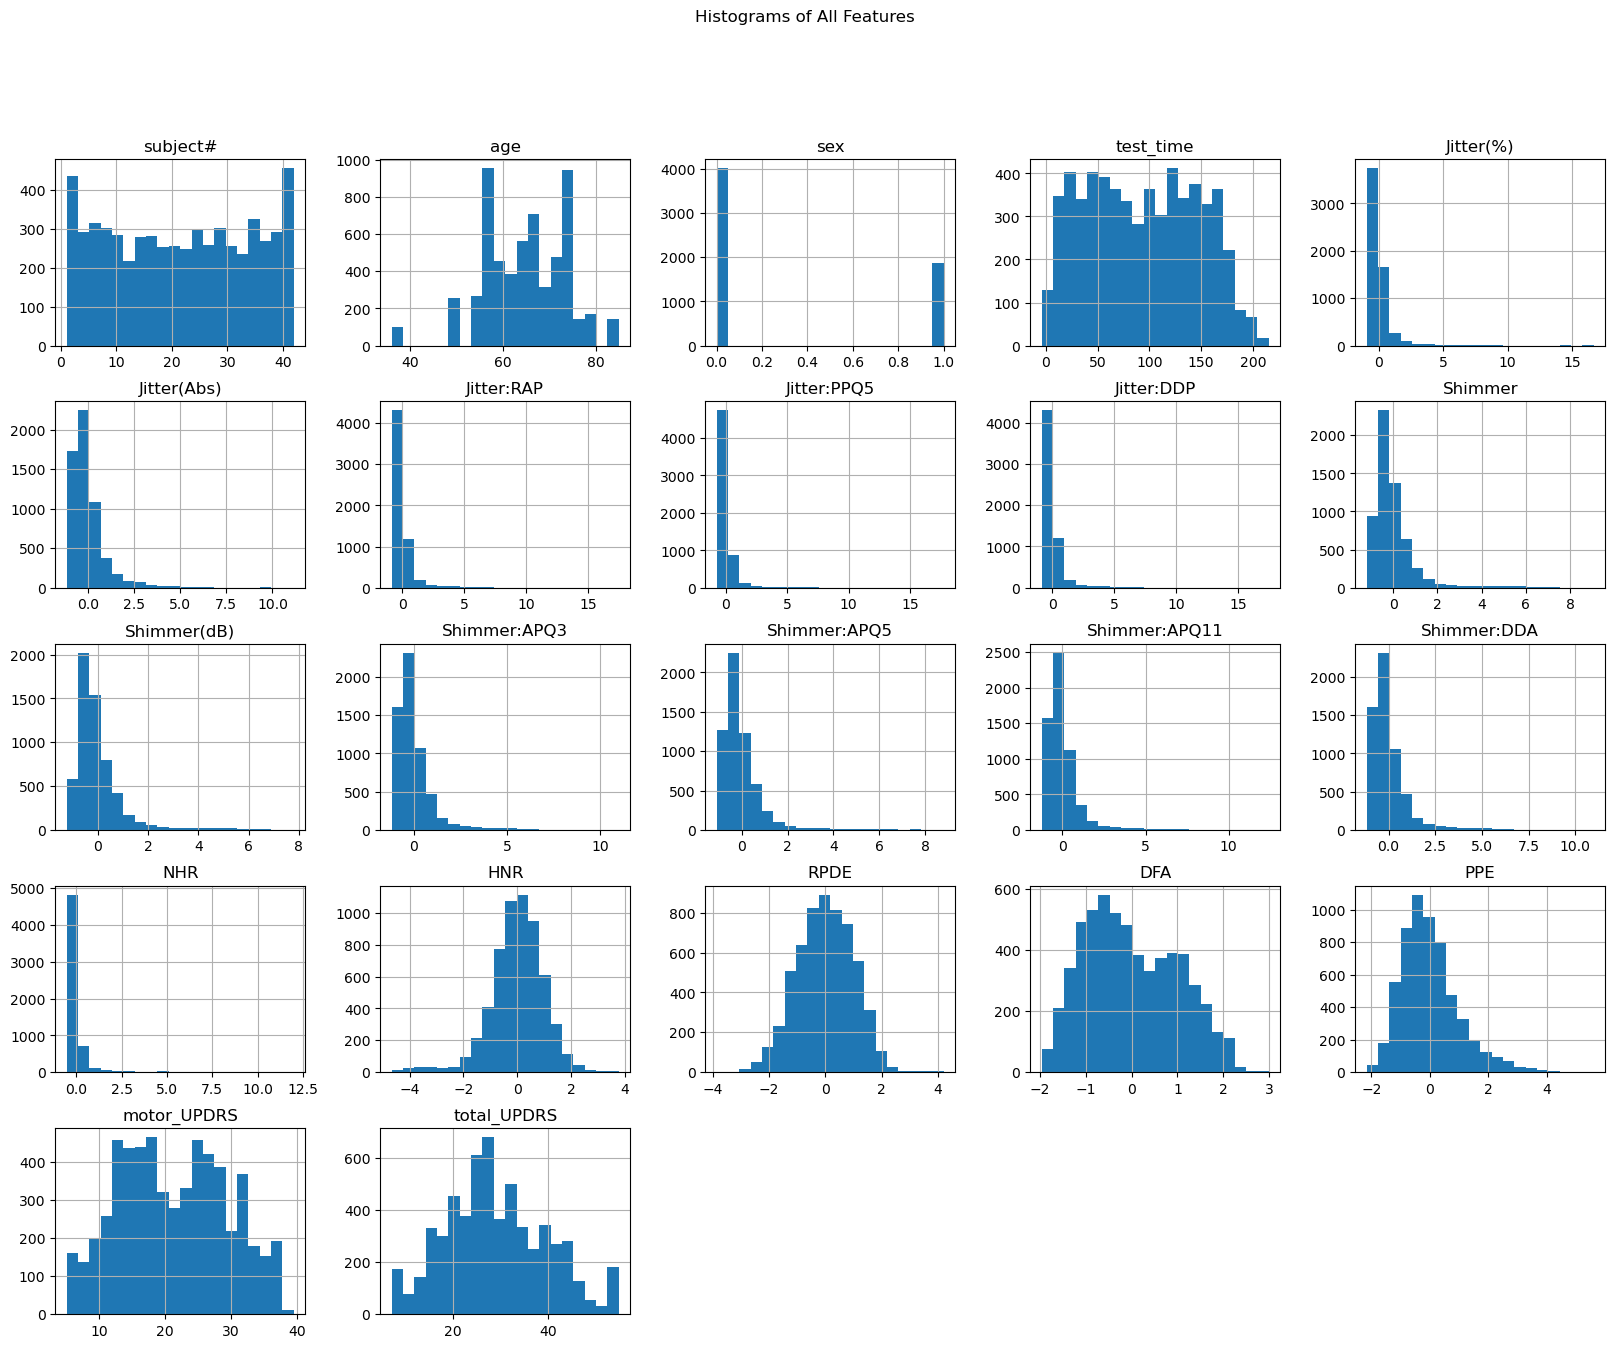

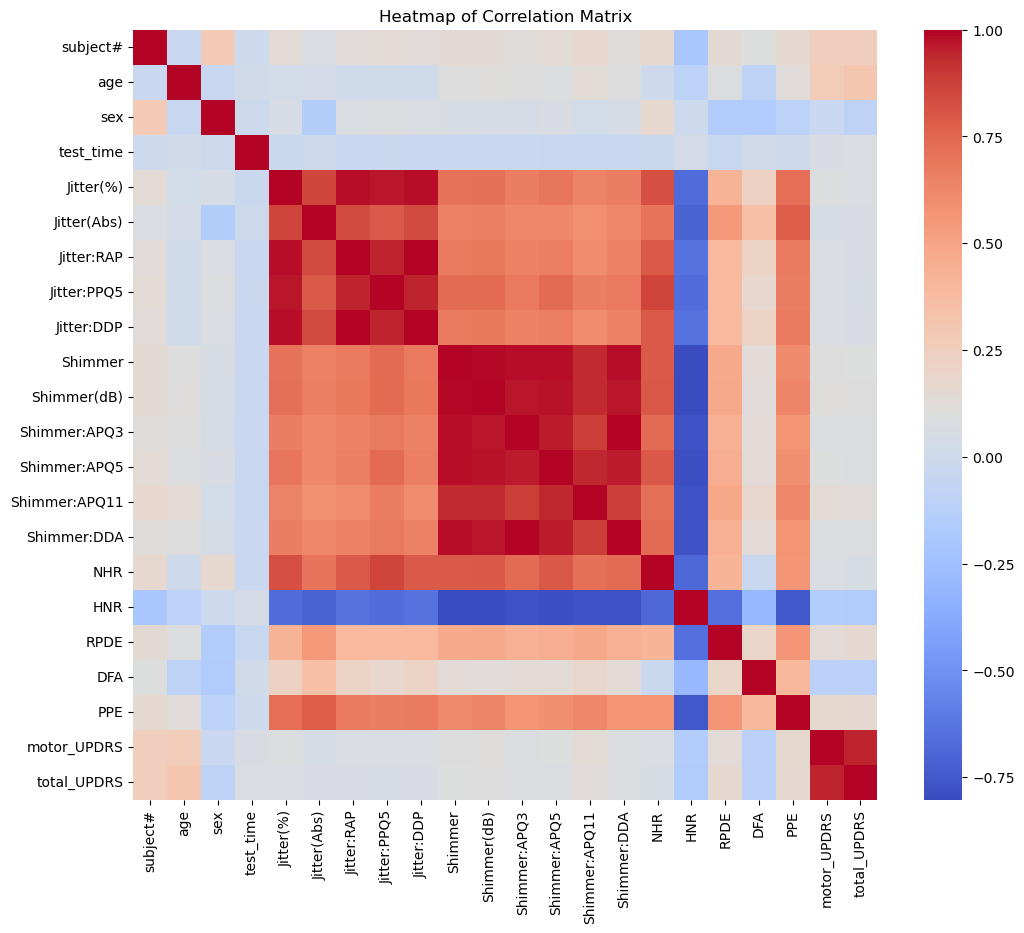

In [4]:
# Generating a subset of the data for pairplot to avoid overloading the plot

# Histograms for all the features
data.hist(figsize=(20, 15), bins=20)
plt.suptitle("Histograms of All Features")
plt.show()

# Heatmap of the correlation matrix for the entire dataset
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()


Age: The distribution of age appears to be slightly right-skewed, suggesting a larger number of older individuals in the dataset. This is consistent with Parkinson's disease being more common in older populations.

Sex: There are only two distinct values, indicating binary encoding (likely 0 and 1). The distribution suggests a disparity in the number of male and female subjects, with one gender being more represented.

Voice Measures (e.g., Jitter, Shimmer, NHR, HNR): Most of these features show right-skewed distributions, indicating that higher values are less common. This skewness is typical in clinical measurements where extreme values are less frequent.

RPDE, DFA, PPE: These features appear to have more uniform distributions, though still with some skewness.

Motor and Total UPDRS: Both target variables show right-skewed distributions. This skewness might indicate that higher UPDRS scores are less common in the dataset, which could be due to the dataset focusing on early-stage Parkinson's disease.

Test Time: It shows a fairly uniform distribution, indicating a wide range of time intervals for the voice recordings.

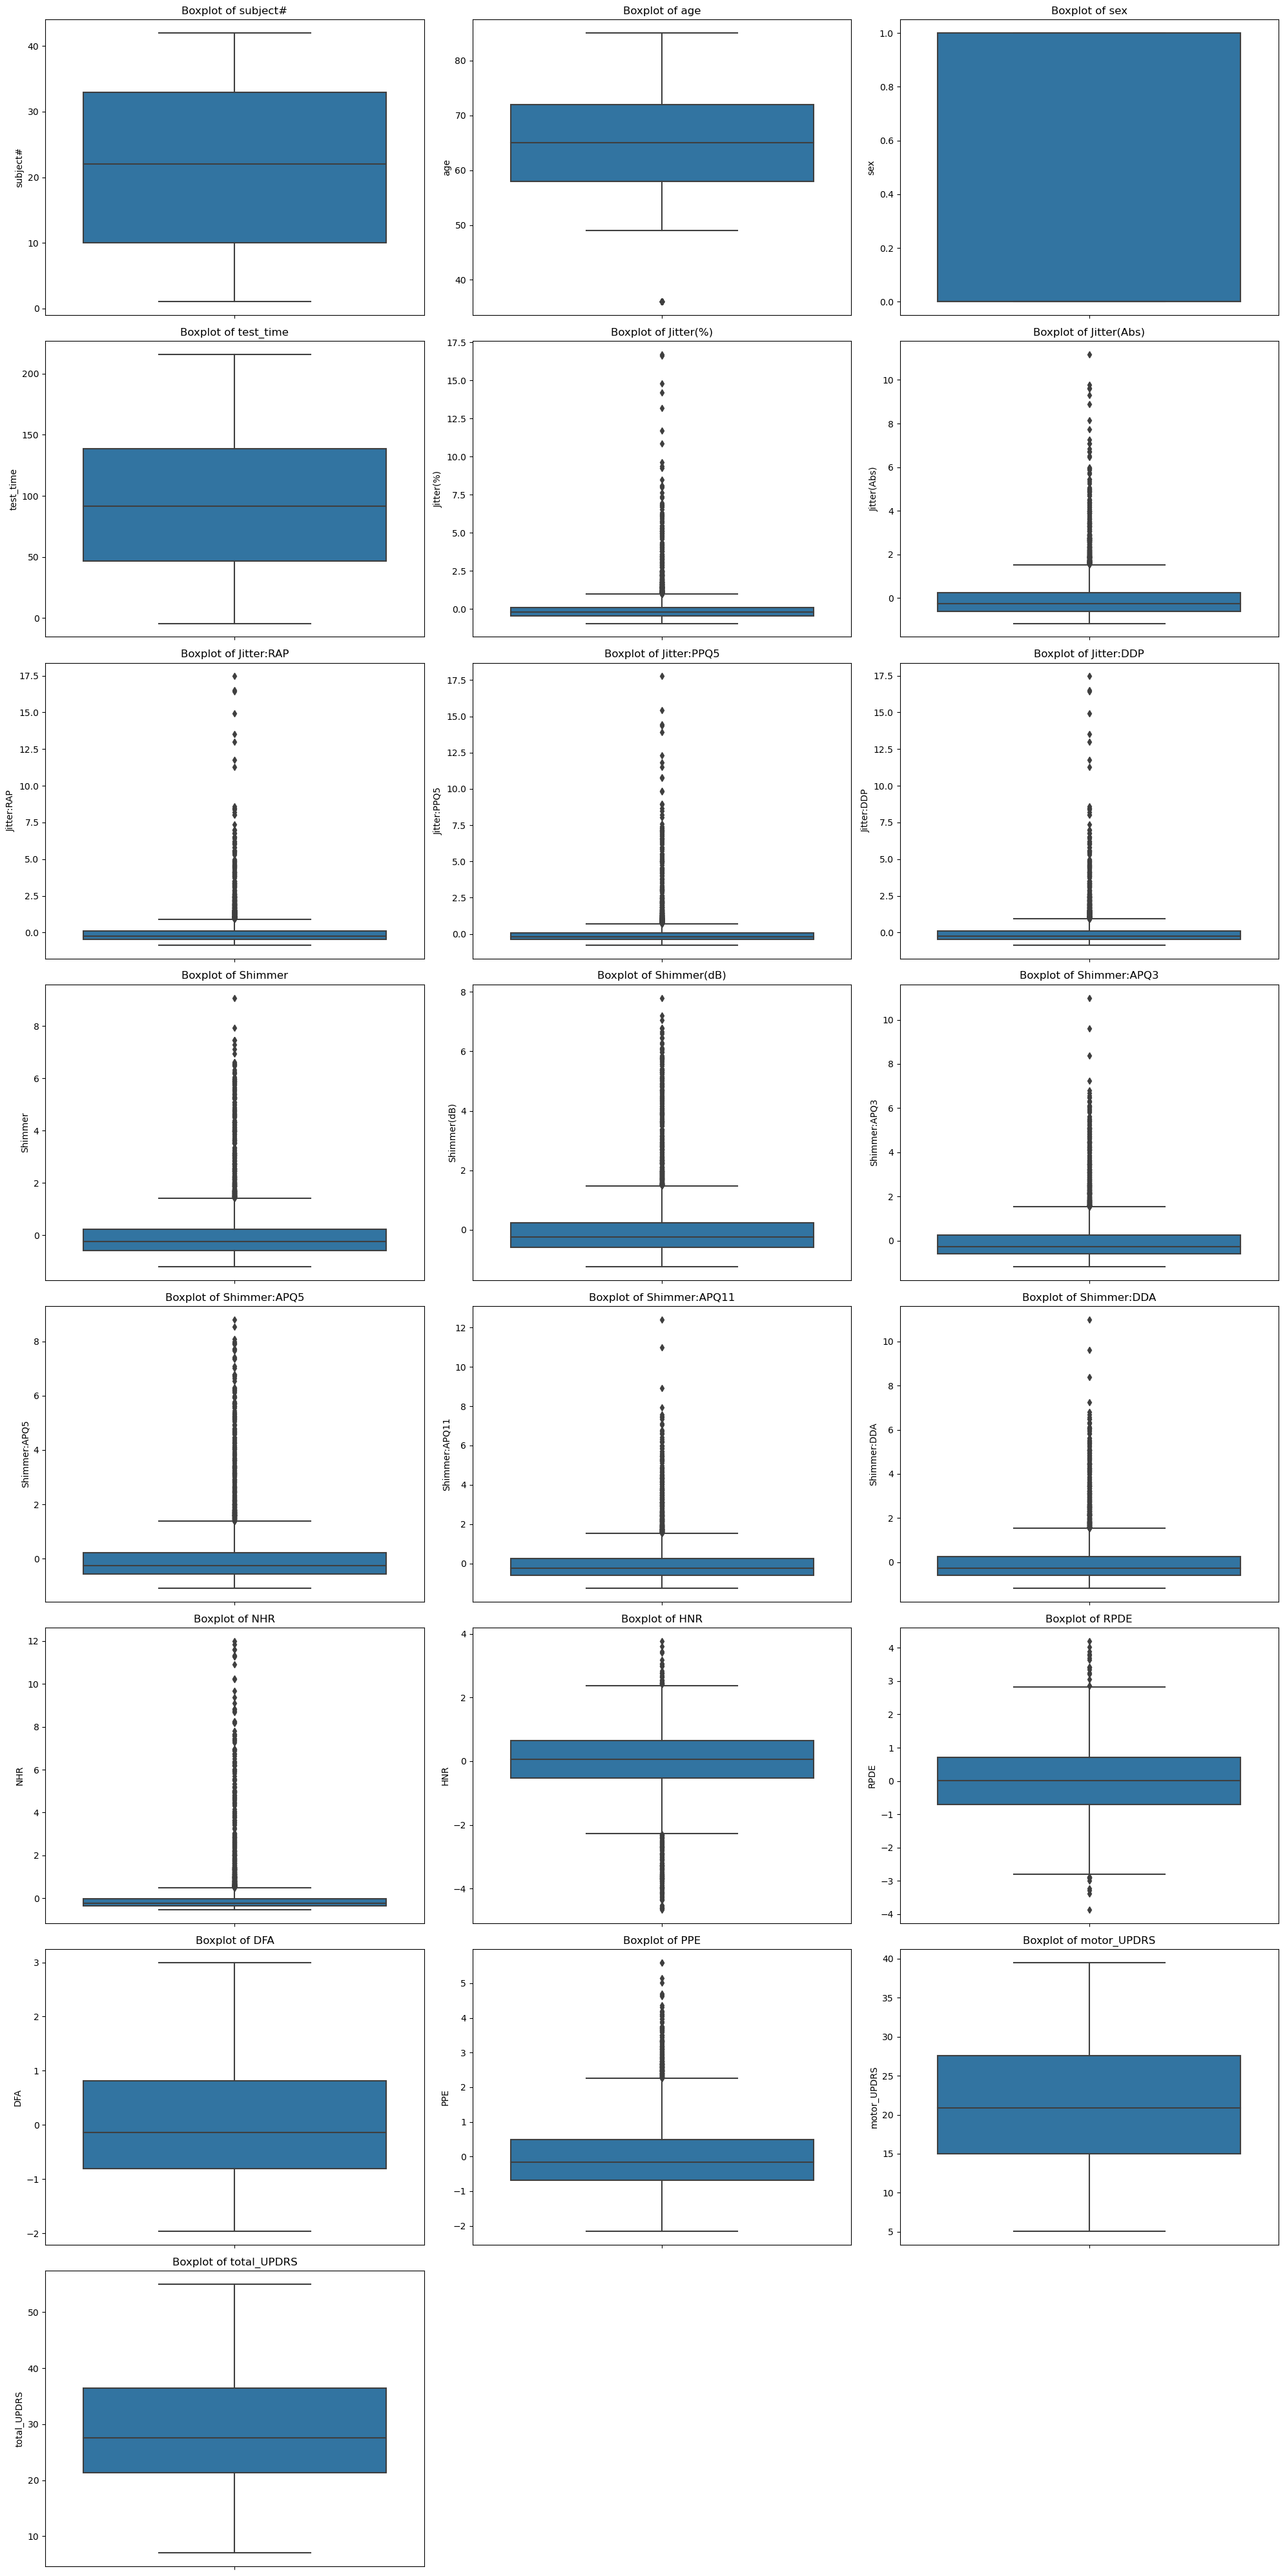

In [7]:
# Python code to generate boxplots for all features in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# List of all features in the dataset
features = data.columns

# Plotting boxplots for each feature
plt.figure(figsize=(20, 40))  # Adjusting figure size for better visibility
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)  # Organizing subplots
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


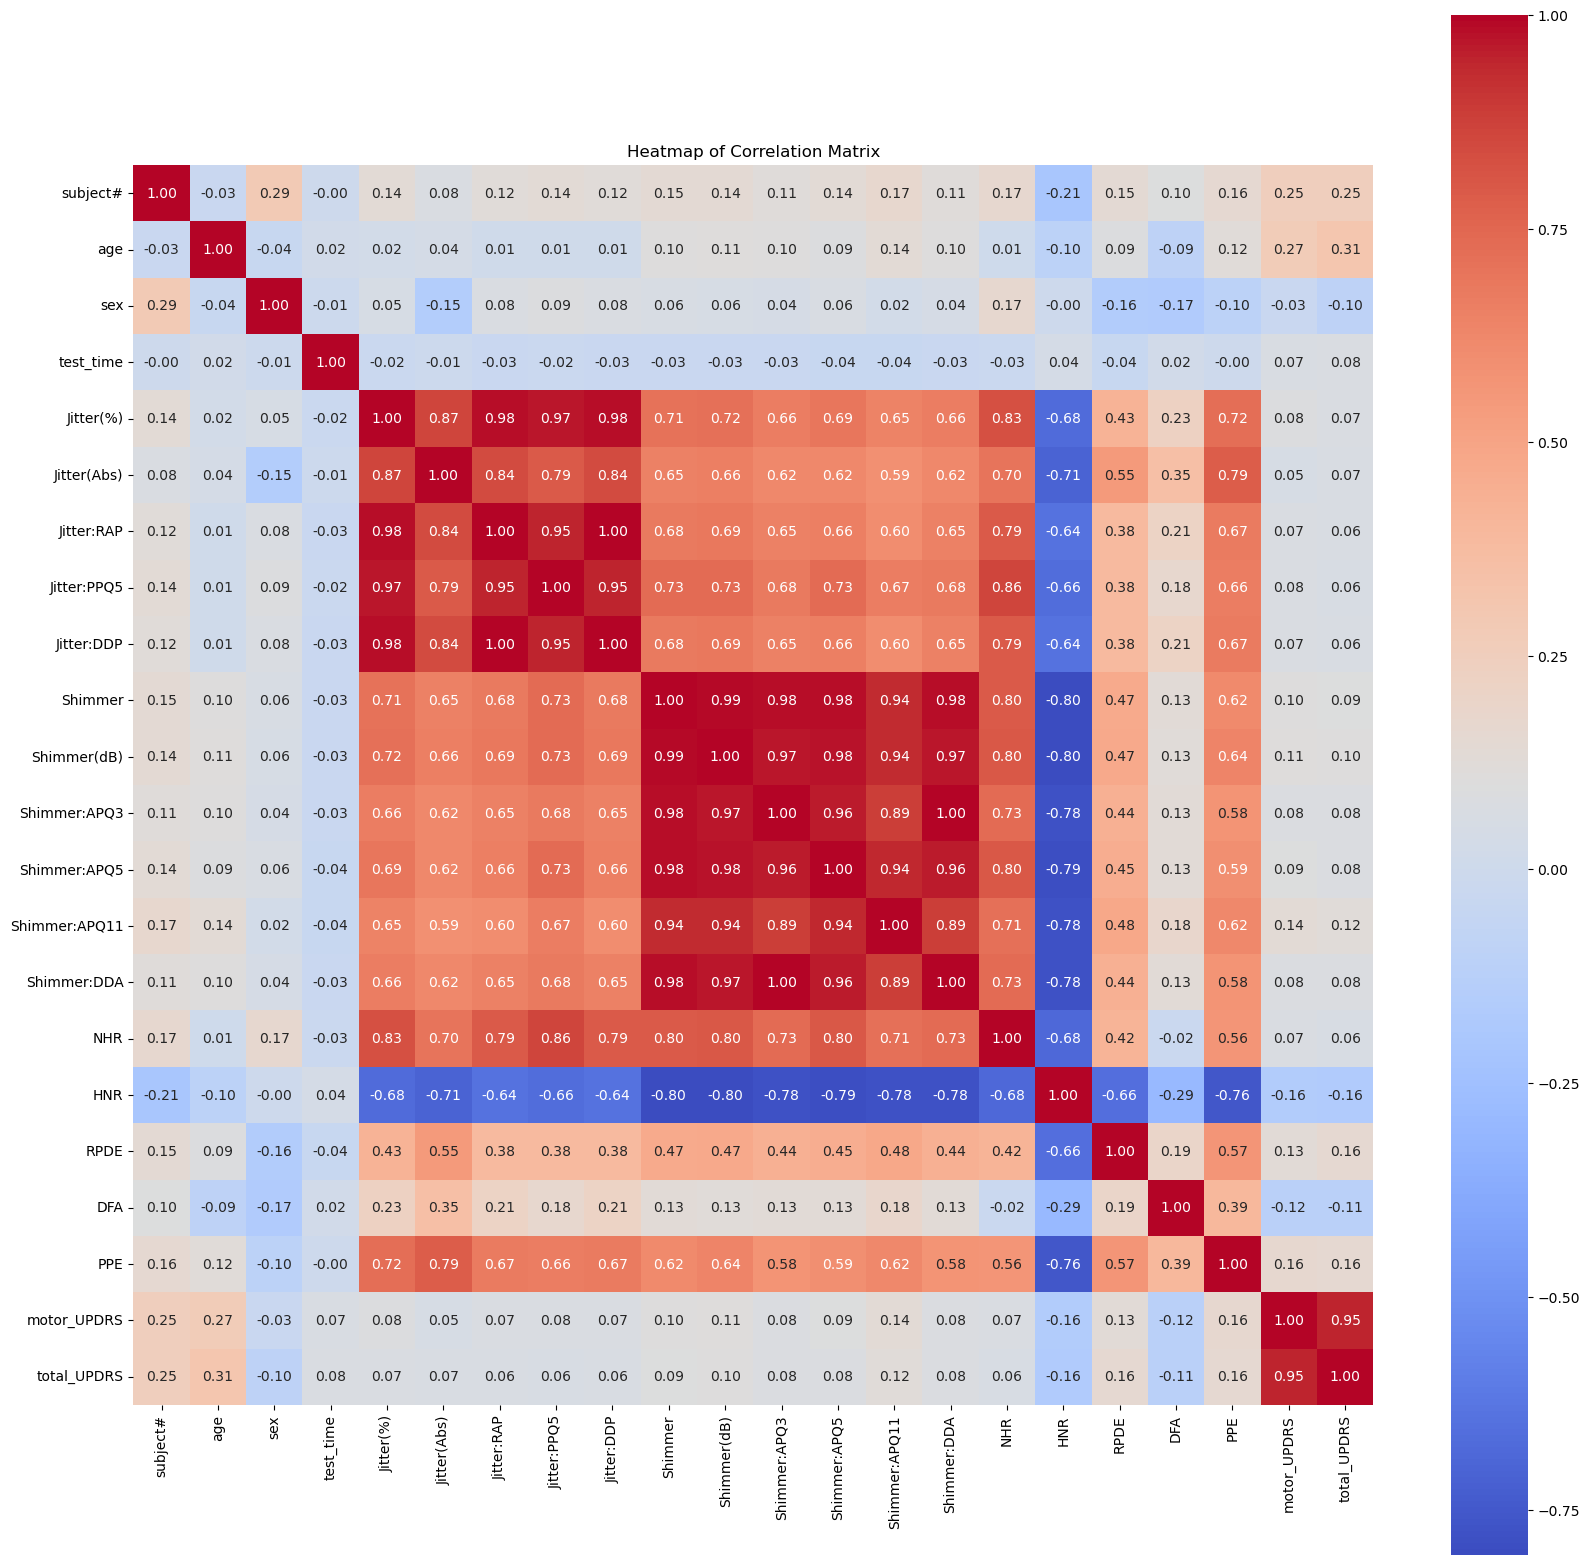

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 20))  # Large figure size for better visibility
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()


The heatmap you've provided visualizes the correlation matrix for your dataset. Each cell in the heatmap corresponds to the correlation coefficient between the features represented by the row and column. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive correlation: as one feature increases, the other feature also increases.
-1 indicates a perfect negative correlation: as one feature increases, the other feature decreases.
0 indicates no correlation: the features do not have a linear relationship.
Here are some key points that can be interpreted from this heatmap:

Diagonal Elements: The diagonal from the top-left to the bottom-right represents the correlation of each feature with itself, which is always 1 (perfect positive correlation).

High Positive Correlation: Features that have high positive correlations (dark red) are likely to increase together. For instance, several Jitter and Shimmer measures are highly correlated with each other.

High Negative Correlation: Features that have high negative correlations (dark blue) indicate an inverse relationship. For example, HNR shows a moderate negative correlation with NHR.

Low or No Correlation: Features that have a correlation close to 0 (white) do not have a significant linear relationship.

Target Variables Correlation: The motor_UPDRS and total_UPDRS show strong positive correlations with each other and varying degrees of correlation with other voice measurement features. 

Sex Feature: The sex feature shows a relatively low correlation with most of the other features, which suggests that it might not have a strong linear relationship with the voice measurements or UPDRS scores.

Potential Multicollinearity: The high correlations amongst some of the features, like the Shimmer measurements, suggest potential multicollinearity, which could affect certain types of models that assume feature independence.

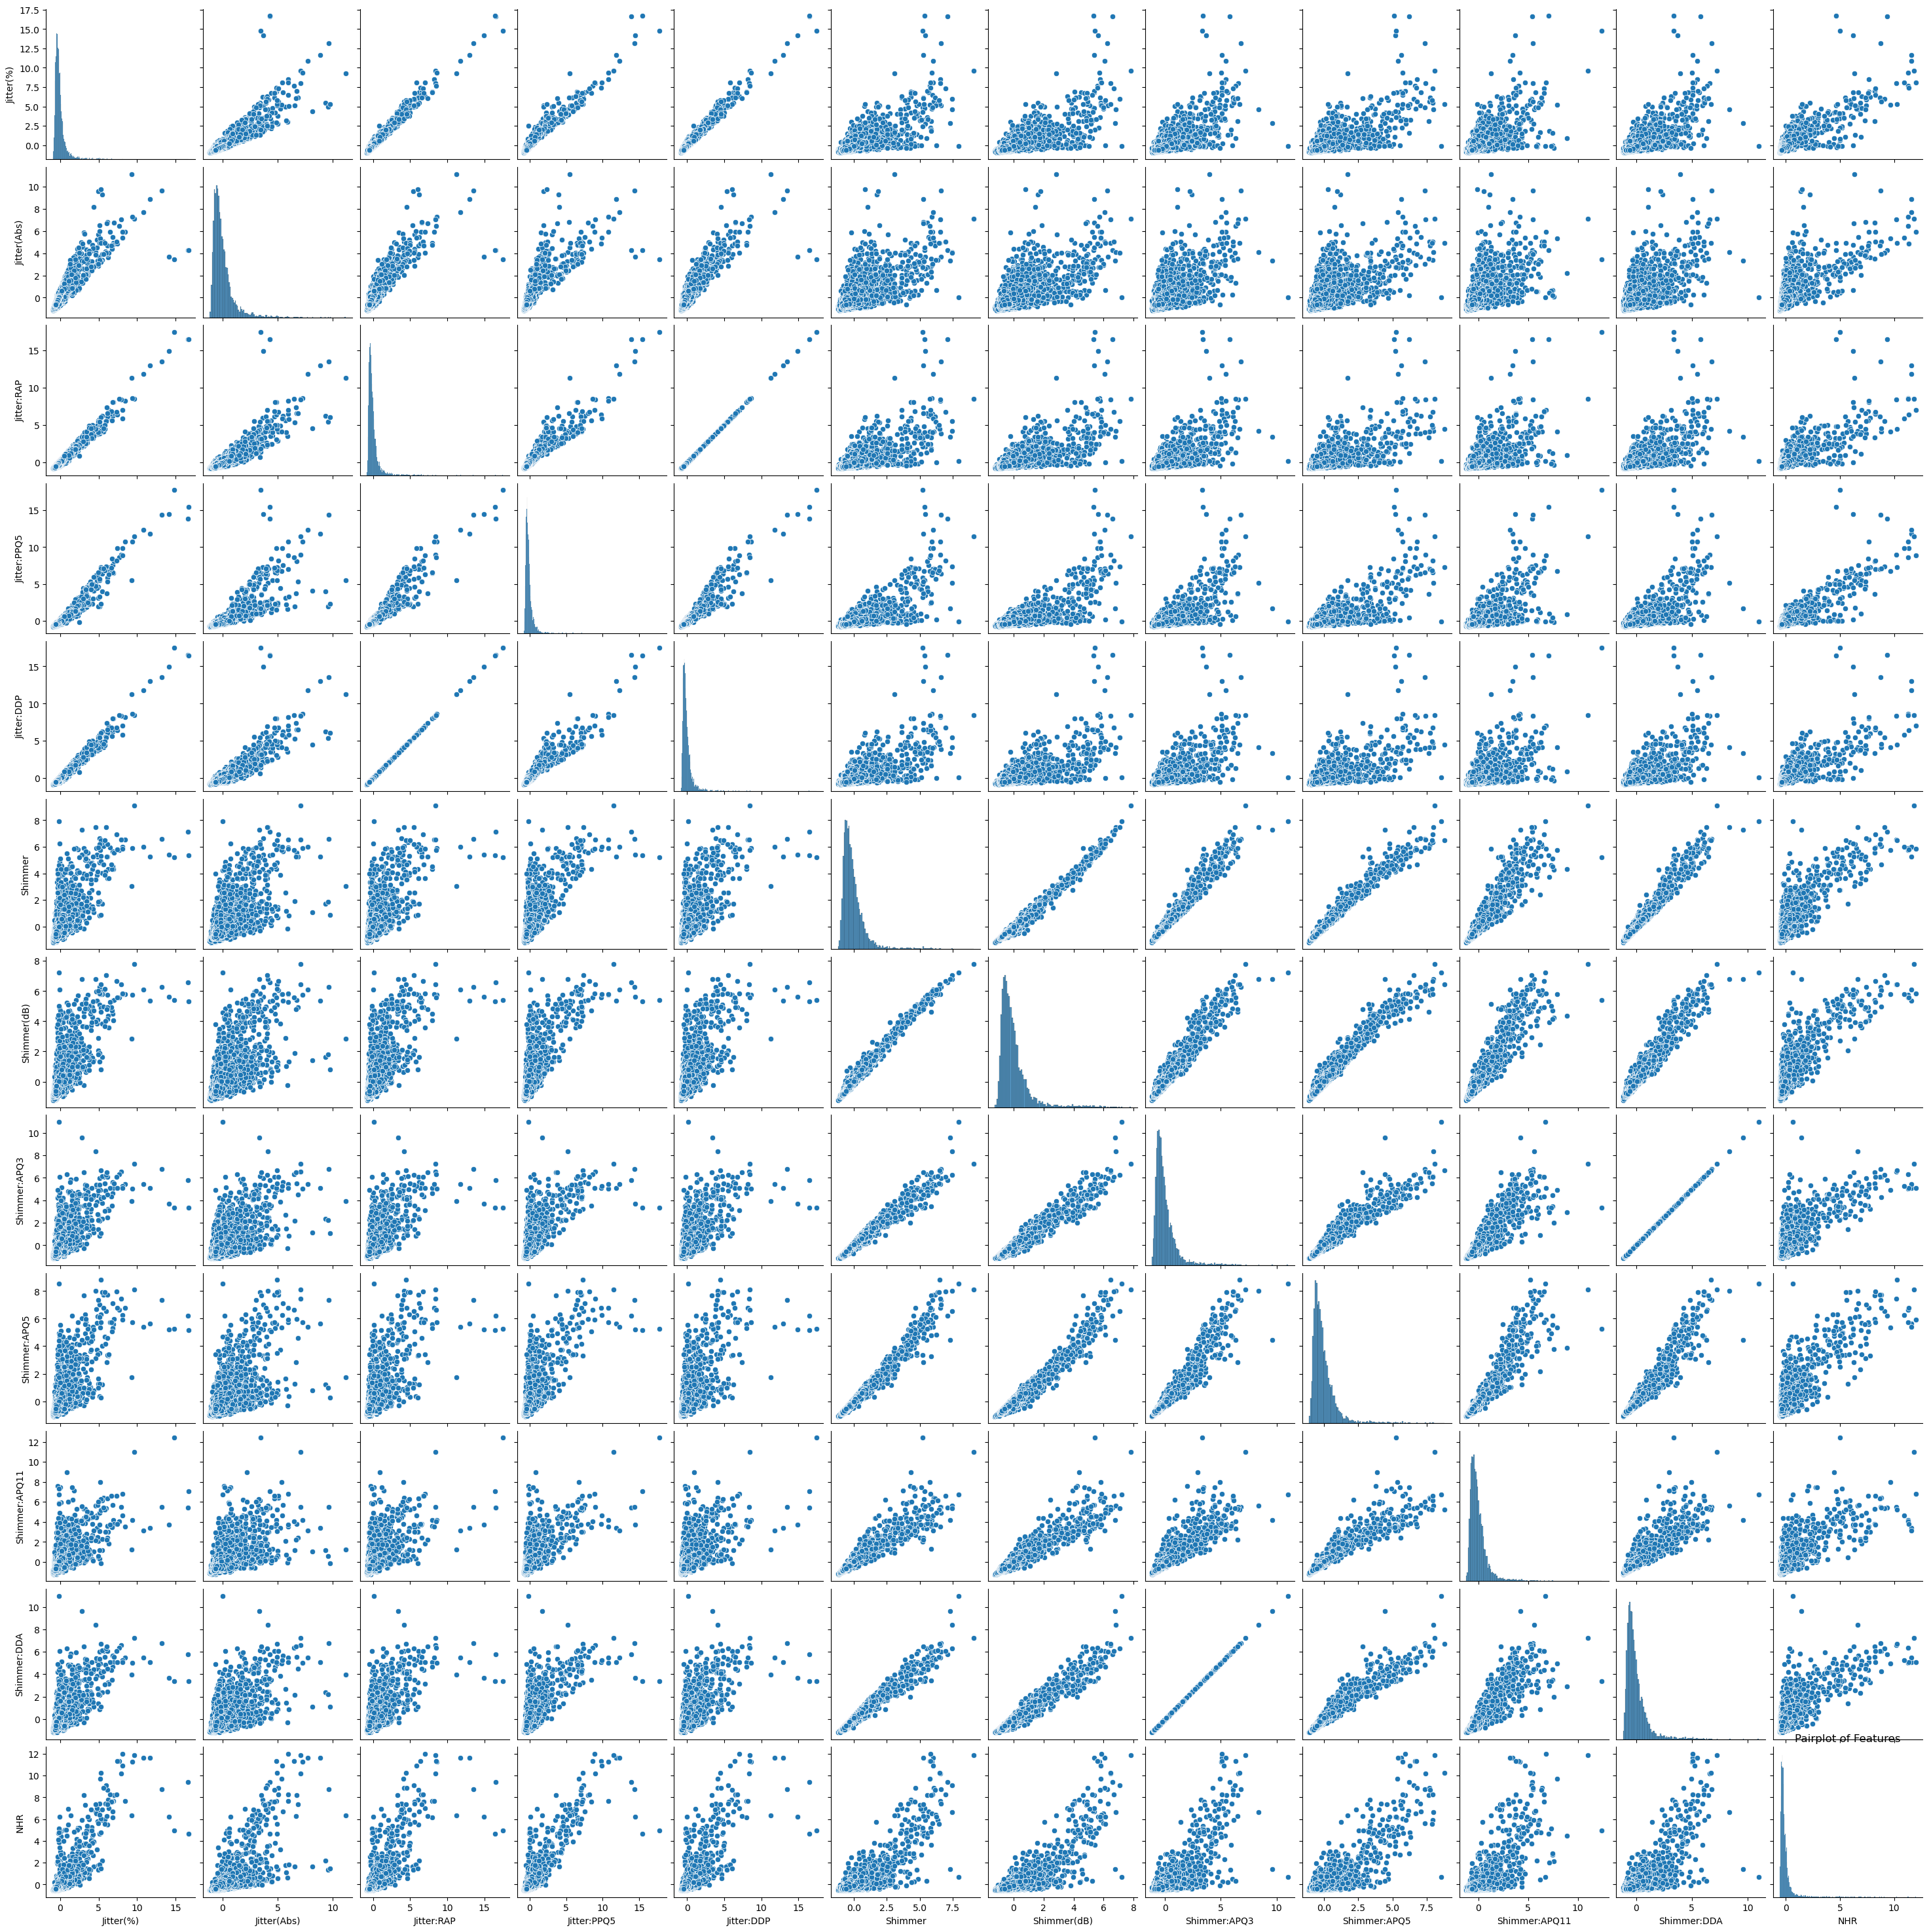

In [9]:
#makin pairplot
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of features for pairplot
features = data.columns[4:16]

# Plotting the pairplot
sns.pairplot(data[features])
plt.title("Pairplot of Features")
plt.show()

In [10]:
import pandas as pd

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375


In [12]:
from sklearn.preprocessing import StandardScaler

# Selecting voice measure columns for standardization (excluding non-voice measure columns)
voice_measure_columns = data.columns[4:-2]  # Excludes subject#, age, sex, test_time, and target variables

# Standardizing the voice measures
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[voice_measure_columns] = scaler.fit_transform(data[voice_measure_columns])

# Display the standardized voice measure columns
data_standardized[voice_measure_columns].describe()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03
mean,1.451321e-16,1.741586e-16,1.935095e-17,-1.935095e-17,1.693208e-16,1.741586e-16,1.838340e-16,4.837738e-17,1.548076e-16,-3.870190e-17,9.675476e-17,-3.870190e-17,-6.385814e-16,1.935095e-16,4.450719e-16,1.741586e-16
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-9.466570e-01,-1.161265e+00,-8.506930e-01,-7.629815e-01,-8.517702e-01,-1.199058e+00,-1.237697e+00,-1.174502e+00,-1.092523e+00,-1.250516e+00,-1.174245e+00,-5.333439e-01,-4.665987e+00,-3.866744e+00,-1.963436e+00,-2.159850e+00
25%,-4.576594e-01,-6.012255e-01,-4.505077e-01,-3.904491e-01,-4.515863e-01,-5.773716e-01,-5.905295e-01,-5.950218e-01,-5.613909e-01,-5.912529e-01,-5.952688e-01,-3.545954e-01,-5.298620e-01,-7.099418e-01,-8.048365e-01,-6.913181e-01
50%,-2.229405e-01,-2.649238e-01,-2.360084e-01,-2.108831e-01,-2.360206e-01,-2.525927e-01,-2.517438e-01,-2.610839e-01,-2.523139e-01,-2.387287e-01,-2.608275e-01,-2.290577e-01,5.605219e-02,7.695473e-03,-1.359690e-01,-1.539957e-01
75%,1.149124e-01,2.575945e-01,9.694579e-02,4.908555e-02,9.693236e-02,2.212206e-01,2.347177e-01,2.583332e-01,2.167030e-01,2.619106e-01,2.585891e-01,-1.100432e-02,6.442969e-01,7.186976e-01,8.194450e-01,4.907692e-01
max,1.668571e+01,1.116072e+01,1.746499e+01,1.776448e+01,1.746598e+01,9.081220e+00,7.800931e+00,1.099383e+01,8.814745e+00,1.240861e+01,1.099408e+01,1.199822e+01,3.774533e+00,4.204980e+00,2.995380e+00,5.597736e+00


In [14]:
from sklearn.model_selection import train_test_split

# Define the features and targets
X = data_standardized[voice_measure_columns]  # Features
y = data_standardized[['motor_UPDRS', 'total_UPDRS']]  # Targets

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the distribution of the targets in the training set to see if resampling is needed
y_train.describe()

,motor_UPDRS,total_UPDRS
count,4700.000000,4700.000000
mean,21.332631,29.076474
std,8.163499,10.742461
min,5.037700,7.000000
25%,15.000000,21.489000
50%,20.896000,27.628000
75%,27.612000,36.452000
max,39.511000,54.992000


In [20]:
# Feature engineering could involve creating polynomial features, interaction terms,
# or other transformations that might help in predicting UPDRS scores better.

from sklearn.preprocessing import PolynomialFeatures

# Instantiate the PolynomialFeatures object with degree 2 to create interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features (we will only do this on the training data to prevent data leakage)
X_train_poly = poly.fit_transform(X_train)

# Transform the feature names to get the new polynomial feature names
poly_features = poly.get_feature_names_out(input_features=voice_measure_columns)

# Create a new DataFrame with the polynomial features
df_train_poly = pd.DataFrame(X_train_poly, columns=poly_features)

# Display the first few rows of the dataframe with polynomial features
df_train_poly.head()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,...,HNR^2,HNR RPDE,HNR DFA,HNR PPE,RPDE^2,RPDE DFA,RPDE PPE,DFA^2,DFA PPE,PPE^2
0,-0.112694,0.140862,-0.066330,-0.020597,-0.065275,0.419417,0.369363,0.458923,0.424655,0.579408,...,1.838271,-0.117716,-1.956986,-0.298177,0.007538,0.125318,0.019094,2.083367,0.317433,0.048366
1,-0.377642,-0.023120,-0.428097,-0.296646,-0.428109,-0.882021,-0.929315,-0.863985,-0.776845,-0.789657,...,0.001598,-0.016615,-0.050311,-0.013805,0.172813,0.523273,0.143585,1.584453,0.434772,0.119301
2,0.237606,-0.112059,0.333855,0.250092,0.334908,0.481353,0.603907,0.653090,0.220004,0.297688,...,0.791579,-0.958432,-0.078439,-0.559462,1.160454,0.094972,0.677388,0.007773,0.055438,0.395410
3,-0.048680,0.529971,-0.027912,-0.084919,-0.026858,-0.655566,-0.694771,-0.695505,-0.581196,-0.554474,...,0.148506,-0.241144,0.382341,-0.199065,0.391570,-0.620846,0.323243,0.984368,-0.512511,0.266839
4,-0.258504,-0.428906,-0.319247,-0.095639,-0.318192,0.288964,0.412797,-0.029141,0.314227,1.049773,...,0.036035,-0.141281,0.008837,0.001226,0.553918,-0.034647,-0.004806,0.002167,0.000301,0.000042


In [23]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Since we have two target variables, we will fit two separate models for them

# Fitting the model for motor_UPDRS
lin_reg_motor = lin_reg.fit(X_train_poly, y_train['motor_UPDRS'])

# Fitting the model for total_UPDRS
lin_reg_total = lin_reg.fit(X_train_poly, y_train['total_UPDRS'])

# We can now evaluate the models using the test set (after transforming it with the same PolynomialFeatures instance)
X_test_poly = poly.transform(X_test)

# Predicting with the fitted models
y_pred_motor = lin_reg_motor.predict(X_test_poly)
y_pred_total = lin_reg_total.predict(X_test_poly)

# Checking the performance using R-squared score
from sklearn.metrics import r2_score

r2_score_motor = r2_score(y_test['motor_UPDRS'], y_pred_motor)
r2_score_total = r2_score(y_test['total_UPDRS'], y_pred_total)

(r2_score_motor, r2_score_total)


(-3.620530708359789, -1.3035578986572065)